In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Datos de ejemplo
data = np.array([[0, 0], [0, 0], [1, 1], [1, 1]])

# Creamos y ajustamos el scaler
scaler = StandardScaler()
scaler.fit(data)

# Transformamos los datos
scaled_data = scaler.transform(data)
print("Datos originales:")
print(data)
print("\nDatos escalados:")
print(scaled_data)
print("\nMedia:", scaled_data.mean(axis=0))
print("Desviación estándar:", scaled_data.std(axis=0))

Datos originales:
[[0 0]
 [0 0]
 [1 1]
 [1 1]]

Datos escalados:
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]

Media: [0. 0.]
Desviación estándar: [1. 1.]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creamos y aplicamos el escalador
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)

print("Datos escalados con MinMaxScaler:")
print(scaled_data)

Datos escalados con MinMaxScaler:
[[0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Datos categóricos de ejemplo
data = pd.DataFrame({
    'color': ['rojo', 'verde', 'azul', 'verde']
})

# Aplicamos one-hot encoding con el nuevo parámetro
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['color']])

# Convertimos a DataFrame para mejor visualización
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['color'])
)

print("Datos originales:")
print(data)
print("\nDatos codificados:")
print(encoded_df)


Datos originales:
   color
0   rojo
1  verde
2   azul
3  verde

Datos codificados:
   color_azul  color_rojo  color_verde
0         0.0         1.0          0.0
1         0.0         0.0          1.0
2         1.0         0.0          0.0
3         0.0         0.0          1.0


Intercepto: 4.22
Pendiente: 2.77


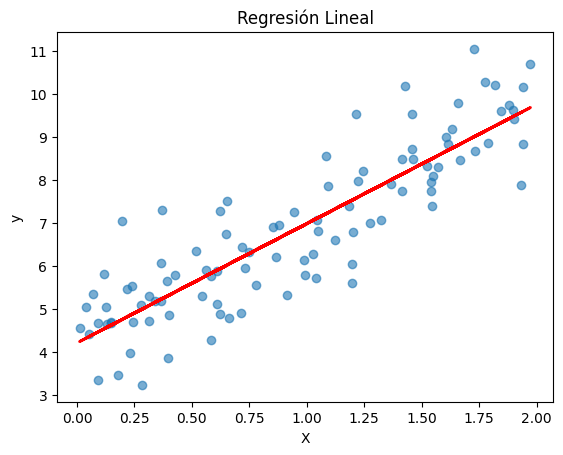

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generamos datos sintéticos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X, y)

# Examinamos los coeficientes
print(f"Intercepto: {model.intercept_[0]:.2f}")
print(f"Pendiente: {model.coef_[0, 0]:.2f}")

# Visualizamos el resultado
plt.scatter(X, y, alpha=0.6)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generamos dataset de clasificación
X, y = make_classification(n_samples=1000, n_features=10,
                          n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluamos el rendimiento
accuracy = log_reg.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.4f}")

# Obtenemos probabilidades de predicción
probs = log_reg.predict_proba(X_test[:5])
print("\nProbabilidades para las primeras 5 muestras:")
print(probs)

Precisión del modelo: 0.8300

Probabilidades para las primeras 5 muestras:
[[0.77860096 0.22139904]
 [0.03190999 0.96809001]
 [0.64214668 0.35785332]
 [0.07473802 0.92526198]
 [0.97540795 0.02459205]]


Precisión del árbol: 0.8550


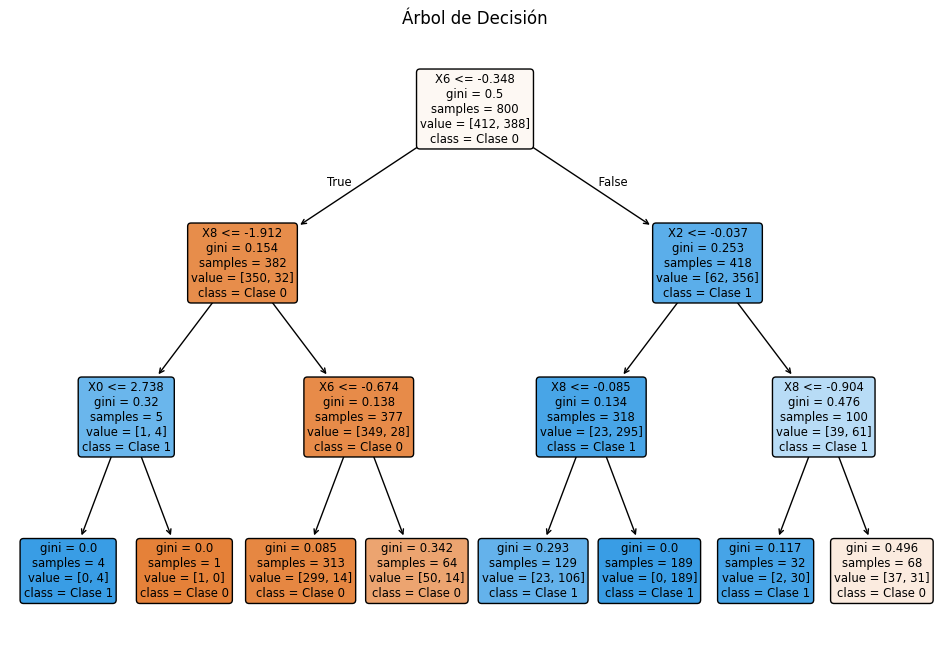

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Creamos y entrenamos el árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Evaluamos el rendimiento
accuracy = tree_clf.score(X_test, y_test)
print(f"Precisión del árbol: {accuracy:.4f}")

# Visualizamos el árbol (versión simplificada)
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=[f"X{i}" for i in range(10)],
          class_names=["Clase 0", "Clase 1"], rounded=True)
plt.title("Árbol de Decisión")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Cargamos el dataset de iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño conjunto prueba: {X_test.shape[0]} muestras")

Tamaño conjunto entrenamiento: 105 muestras
Tamaño conjunto prueba: 45 muestras


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Creamos un modelo
svm = SVC(kernel='rbf', gamma='scale')

# Evaluamos mediante validación cruzada (5-fold)
cv_scores = cross_val_score(svm, X, y, cv=5)

print("Puntuaciones por fold:", cv_scores)
print(f"Precisión media: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")

Puntuaciones por fold: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Precisión media: 0.9667
Desviación estándar: 0.0211


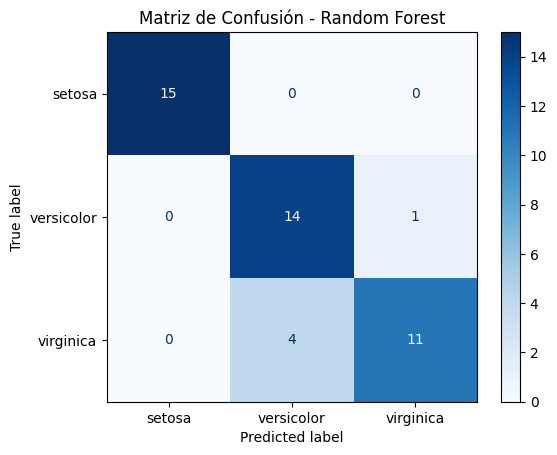

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Entrenamos un modelo
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizamos predicciones
y_pred = rf.predict(X_test)

# Calculamos y visualizamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names
)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Métricas adicionales
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Creamos un modelo secuencial
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),  # Capa de entrada
    layers.Dense(32, activation='relu'),                     # Capa oculta
    layers.Dense(16, activation='relu'),                     # Capa oculta
    layers.Dense(1, activation='sigmoid')                    # Capa de salida
])

# Mostramos la arquitectura del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',               # Algoritmo de optimización
    loss='binary_crossentropy',     # Función de pérdida
    metrics=['accuracy']            # Métrica a monitorear
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4736 - loss: 0.6984 - val_accuracy: 0.4450 - val_loss: 0.7010
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5211 - loss: 0.6928 - val_accuracy: 0.4750 - val_loss: 0.6963
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5542 - loss: 0.6900 - val_accuracy: 0.4900 - val_loss: 0.6950
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5656 - loss: 0.6904 - val_accuracy: 0.4600 - val_loss: 0.6987
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5427 - loss: 0.6873 - val_accuracy: 0.5250 - val_loss: 0.6949
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5502 - loss: 0.6860 - val_accuracy: 0.5050 - val_loss: 0.6932
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5534 - loss: 0.6858 - val_accuracy: 0.4950 - val_loss: 0.6984
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5517 - loss: 0.6865 - val_accuracy: 0.5300 - val_loss

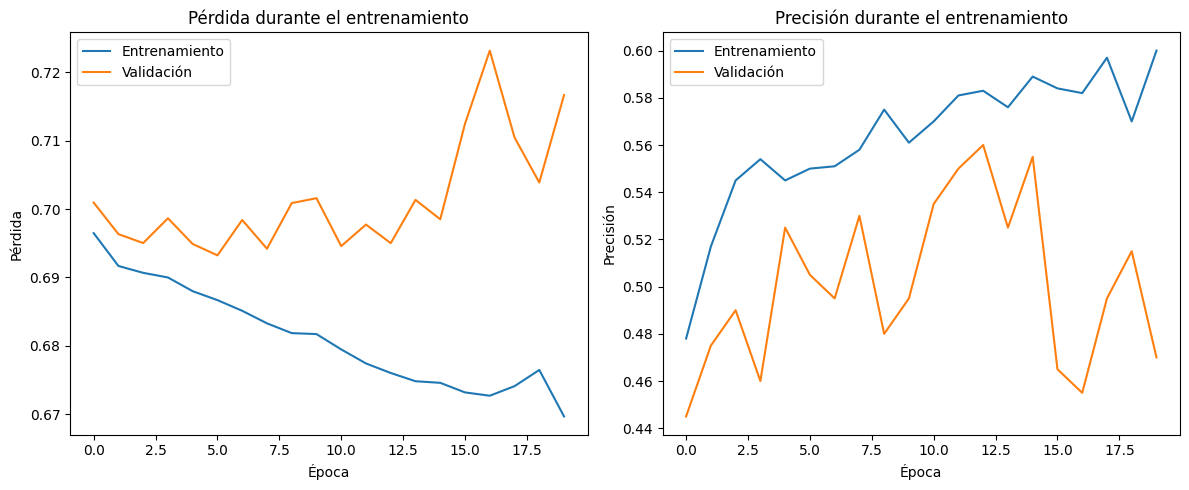

In [ ]:
# Generamos datos sintéticos
import numpy as np

np.random.seed(42)
X_train = np.random.random((1000, 10))
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.random((200, 10))
y_val = np.random.randint(2, size=(200, 1))

# Entrenamos el modelo
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Visualizamos el progreso del entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
!pip install keras-tuner


Reloading Tuner from my_dir/mnist_tuning/tuner0.json
Mejor número de unidades: 512
Mejor tasa de dropout: 0.2
Mejor tasa de aprendizaje: 0.0007550512369503543
Número de capas adicionales: 1
Unidades en capa adicional 1: 192
Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8864 - loss: 0.3718 - val_accuracy: 0.9675 - val_loss: 0.1076
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9687 - loss: 0.0991 - val_accuracy: 0.9764 - val_loss: 0.0763
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9788 - loss: 0.0655 - val_accuracy: 0.9743 - val_loss: 0.0792
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9824 - loss: 0.0536 - val_accuracy: 0.9773 - val_loss: 0.0773
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9860 - loss: 0.0440 - val_accuracy: 0.9780 - val_loss: 0.0709
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0374 - val_accuracy: 0.9825 - val_loss: 0.

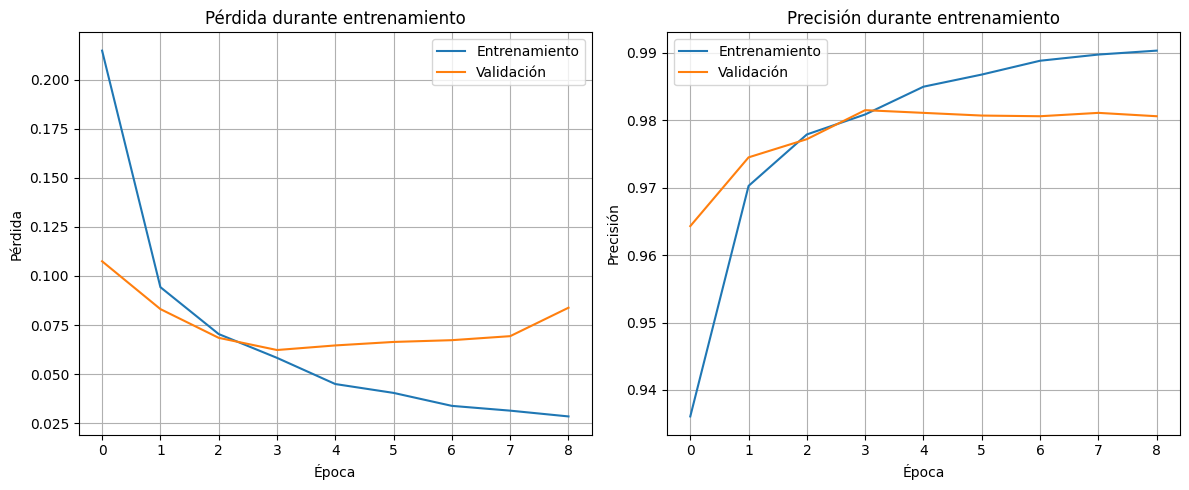

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7848 - loss: 0.6705 - val_accuracy: 0.9799 - val_loss: 0.0611
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9559 - loss: 0.1485 - val_accuracy: 0.9855 - val_loss: 0.0439
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9691 - loss: 0.1038 - val_accuracy: 0.9883 - val_loss: 0.0365
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9755 - loss: 0.0823 - val_accuracy: 0.9887 - val_loss: 0.0325
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9783 - loss: 0.0709 - val_accuracy: 0.9900 - val_loss: 0.0313
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0365
Precisión del modelo CNN: 0.9900
Precisión del mejor modelo denso: 0.9815


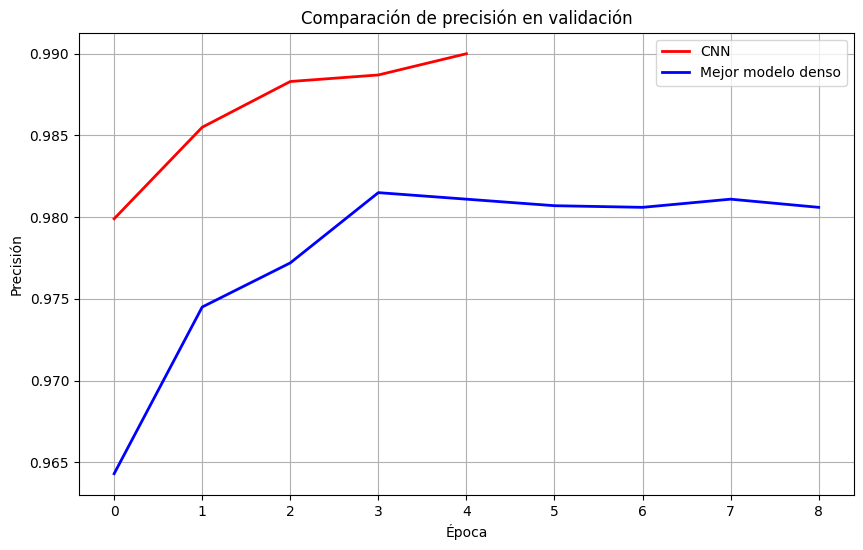

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt

# Cargamos el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocesamos los datos - APLANAMOS para el modelo denso
X_train_flat = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test_flat = X_test.reshape(-1, 784).astype('float32') / 255.0

# También conservamos formato de imagen para la CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convertimos las etiquetas a formato categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para el modelo denso (para búsqueda de hiperparámetros)
def build_model(hp):
    model = models.Sequential()

    # Ajustamos número de neuronas
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(hp_units, activation='relu', input_shape=(784,)))

    # Ajustamos tasa de dropout
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout))

    # Ajustamos capas adicionales
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # Ajustamos tasa de aprendizaje
    hp_learning_rate = hp.Float('learning_rate',
                               min_value=1e-4, max_value=1e-2,
                               sampling='log')

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

# Creamos un buscador de hiperparámetros
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mnist_tuning'
)

# Ejecutamos la búsqueda con los datos APLANADOS
tuner.search(X_train_flat, y_train,
            epochs=10,
            validation_data=(X_test_flat, y_test),
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Obtenemos los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejor número de unidades: {best_hps.get('units')}")
print(f"Mejor tasa de dropout: {best_hps.get('dropout')}")
print(f"Mejor tasa de aprendizaje: {best_hps.get('learning_rate')}")
print(f"Número de capas adicionales: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Unidades en capa adicional {i+1}: {best_hps.get(f'units_{i}')}")

# Construimos el mejor modelo con los hiperparámetros optimizados
best_model = tuner.hypermodel.build(best_hps)

# Entrenamos el mejor modelo
history = best_model.fit(
    X_train_flat, y_train,
    epochs=15,
    validation_data=(X_test_flat, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# Evaluamos el mejor modelo
test_loss, test_acc = best_model.evaluate(X_test_flat, y_test)
print(f"Precisión final del mejor modelo: {test_acc:.4f}")
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt

# Cargamos el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocesamos los datos - APLANAMOS para el modelo denso
X_train_flat = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test_flat = X_test.reshape(-1, 784).astype('float32') / 255.0

# También conservamos formato de imagen para la CNN
X_train_cnn = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convertimos las etiquetas a formato categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para el modelo denso (para búsqueda de hiperparámetros)
def build_model(hp):
    model = models.Sequential()

    # Ajustamos número de neuronas
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(hp_units, activation='relu', input_shape=(784,)))

    # Ajustamos tasa de dropout
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(hp_dropout))

    # Ajustamos capas adicionales
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # Ajustamos tasa de aprendizaje
    hp_learning_rate = hp.Float('learning_rate',
                               min_value=1e-4, max_value=1e-2,
                               sampling='log')

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

# Creamos un buscador de hiperparámetros
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mnist_tuning'
)

# Ejecutamos la búsqueda con los datos APLANADOS
tuner.search(X_train_flat, y_train,
            epochs=10,
            validation_data=(X_test_flat, y_test),
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Obtenemos los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejor número de unidades: {best_hps.get('units')}")
print(f"Mejor tasa de dropout: {best_hps.get('dropout')}")
print(f"Mejor tasa de aprendizaje: {best_hps.get('learning_rate')}")
print(f"Número de capas adicionales: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Unidades en capa adicional {i+1}: {best_hps.get(f'units_{i}')}")

# Construimos el mejor modelo con los hiperparámetros optimizados
best_model = tuner.hypermodel.build(best_hps)

# Entrenamos el mejor modelo
history = best_model.fit(
    X_train_flat, y_train,
    epochs=15,
    validation_data=(X_test_flat, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# Evaluamos el mejor modelo
test_loss, test_acc = best_model.evaluate(X_test_flat, y_test)
print(f"Precisión final del mejor modelo: {test_acc:.4f}")

# Visualizamos la curva de aprendizaje
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# COMPARACIÓN CON UN MODELO CNN
# Ahora, para comparar con el modelo CNN que ya tenías funcionando:

# Construimos el modelo CNN
cnn_model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Aplanamos para conectar con capas densas
    layers.Flatten(),

    # Capas densas finales
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilamos el modelo CNN
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos el modelo CNN
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_cnn, y_test)
)

# Evaluamos el modelo CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Precisión del modelo CNN: {cnn_test_acc:.4f}")
print(f"Precisión del mejor modelo denso: {test_acc:.4f}")

# Comparamos visualmente ambos modelos
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['val_accuracy'], 'r-', linewidth=2, label='CNN')
plt.plot(history.history['val_accuracy'], 'b-', linewidth=2, label='Mejor modelo denso')
plt.title('Comparación de precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_breast_cancer

# Cargamos un dataset médico
data = load_breast_cancer()
X, y = data.data, data.target

# Creamos un pipeline completo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definimos una búsqueda de hiperparámetros
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Ejecutamos búsqueda en grid con validación cruzada
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search.fit(X, y)

# Mostramos mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor puntuación CV: {grid_search.best_score_:.4f}")

# Evaluamos con validación cruzada adicional
final_scores = cross_val_score(
    grid_search.best_estimator_, X, y, cv=10)
print(f"Puntuación media final: {final_scores.mean():.4f}")
print(f"Desviación estándar: {final_scores.std():.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Mejor puntuación CV: 0.9631
Puntuación media final: 0.9667
Desviación estándar: 0.0308


TensorFlow version: 2.18.0
Memoria GPU liberada
Cargando el dataset CIFAR-10...


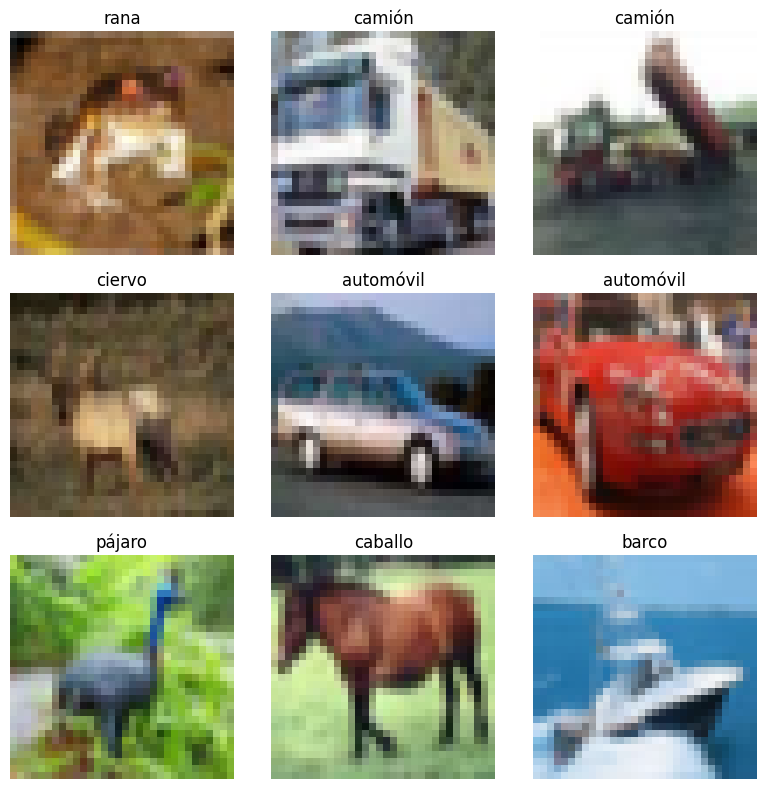

Preparando los datos...
Cargando modelo base MobileNetV2...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_0.75_128            │ (None, 4, 4, 1280)     │     1,382,064 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,382,064 (5.27 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,382,064 (5.27 MB)

Iniciando entrenamiento del modelo...
Epoch 1/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6390 - loss: 1.0580 - val_accuracy: 0.8238 - val_loss: 0.5019 - learning_rate: 0.0010
Epoch 2/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7398 - loss: 0.7438 - val_accuracy: 0.8317 - val_loss: 0.4794 - learning_rate: 0.0010
Epoch 3/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7576 - loss: 0.6963 - val_accuracy: 0.8392 - val_loss: 0.4619 - learning_rate: 0.0010
Epoch 4/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7671 - loss: 0.6683 - val_accuracy: 0.8377 - val_loss: 0.4618 - learning_rate: 0.0010
Epoch 5/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7754 - loss: 0.6526 - val_accuracy: 0.8432 - val_loss: 0.4500 - learning_rate: 0.0010
Epoch 6/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7739 - loss: 0.6420 - val_accuracy: 0.8474 - val_loss: 0.4376 - learning_rate: 0.0010
Epoch 7/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 1

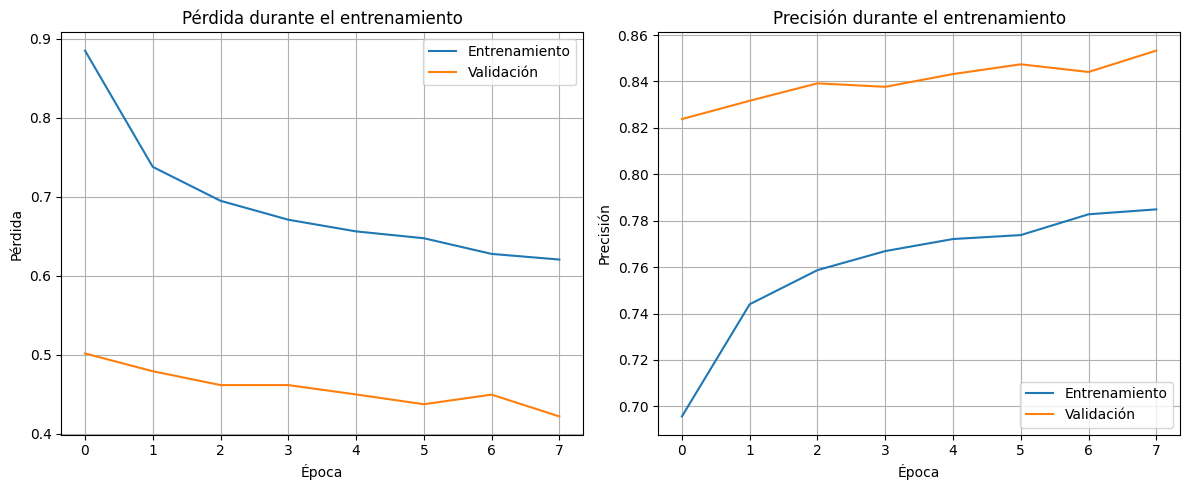

Iniciando ajuste fino (fine-tuning)...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.6971 - loss: 1.0128 - val_accuracy: 0.8550 - val_loss: 0.4430 - learning_rate: 1.0000e-05
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7683 - loss: 0.6988 - val_accuracy: 0.8613 - val_loss: 0.4216 - learning_rate: 1.0000e-05
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7862 - loss: 0.6326 - val_accuracy: 0.8620 - val_loss: 0.4109 - learning_rate: 1.0000e-05
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8020 - loss: 0.5800 - val_accuracy: 0.8657 - val_loss: 0.3988 - learning_rate: 1.0000e-05
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8137 - loss: 0.5452 - val_accuracy: 0.8697 - val_loss: 0.3842 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 5.
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8669 - loss: 0.3891
Precisión final después del ajuste fino: 

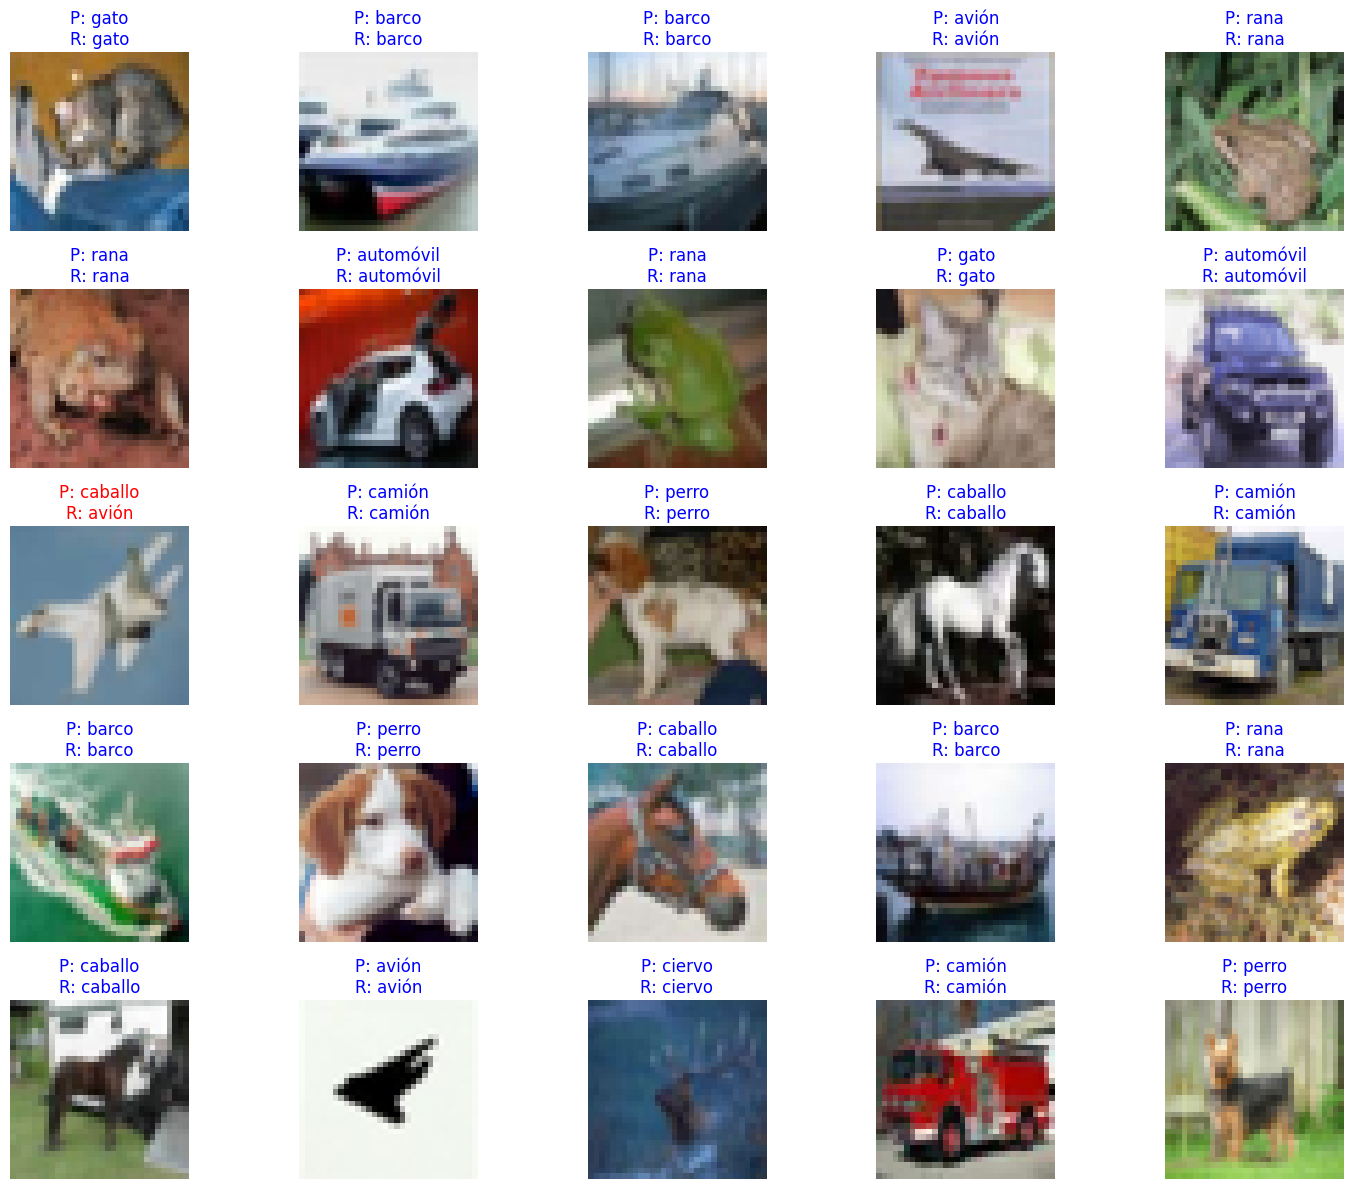

Modelo guardado como 'cifar10_mobilenet_small.h5'


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np

# Verificamos la versión de TensorFlow
print(f"TensorFlow version: {tf.__version__}")

# Liberamos memoria de GPU si está disponible
try:
    tf.keras.backend.clear_session()
    print("Memoria GPU liberada")
except:
    pass

# Cargamos el dataset CIFAR-10 (viene incluido en Keras)
print("Cargando el dataset CIFAR-10...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Nombres de las clases en CIFAR-10 para referencia
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Visualizamos solo 9 imágenes para economizar memoria
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Convertimos etiquetas a formato one-hot
print("Preparando los datos...")
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# OPTIMIZACIÓN: En lugar de redimensionar todas las imágenes de antemano,
# crearemos una función de preprocesamiento que se ejecutará durante el entrenamiento
def preprocess_image(image, label):
    # Redimensionamos a un tamaño más pequeño (128x128 en lugar de 224x224)
    image = tf.image.resize(image, (128, 128))
    # Normalizamos
    image = image / 255.0
    return image, label

# Creamos datasets de TensorFlow para procesamiento más eficiente
BATCH_SIZE = 64  # Tamaño de lote más grande para mayor eficiencia
BUFFER_SIZE = 1000  # Buffer para shuffle

# Creamos datasets de TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_one_hot))

# Aplicamos preprocesamiento
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Configuramos para mejor rendimiento
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Configuramos aumento de datos para las imágenes de entrenamiento (más ligero)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# Usamos un modelo más pequeño y eficiente: MobileNetV2 con tamaño de imagen reducido
print("Cargando modelo base MobileNetV2...")
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
    alpha=0.75  # Versión más pequeña del modelo (75% de filtros)
)

# Congelamos las capas del modelo base
base_model.trainable = False

# Construimos el modelo completo (estructura más ligera)
model = models.Sequential([
    # Capa de aumento de datos
    data_augmentation,

    # Preprocesamiento para MobileNetV2
    layers.Lambda(lambda x: tf.keras.applications.mobilenet_v2.preprocess_input(x * 255.0)),

    # Modelo base
    base_model,

    # Capas superiores para la clasificación (reducidas)
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),  # Reducido de 1024 a 512
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Mostramos el resumen del modelo
model.summary()

# Definimos callbacks para el entrenamiento (optimizados)
model_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,  # Reducido de 5 a 3
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2,  # Reducido de 3 a 2
        min_lr=1e-6,
        verbose=1
    )
]

# Compilamos el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Tasa de aprendizaje aumentada para entrenar más rápido
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos el modelo con menos épocas
print("Iniciando entrenamiento del modelo...")
history = model.fit(
    train_ds,
    epochs=8,  # Reducido de 15 a 8
    validation_data=test_ds,
    callbacks=model_callbacks
)

# Evaluamos el modelo
print("Evaluando el modelo...")
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Precisión en prueba: {test_accuracy:.4f}")

# Visualizamos las curvas de aprendizaje
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Fase 2: Fine-tuning reducido (solo unas pocas capas)
print("Iniciando ajuste fino (fine-tuning)...")
# Descongelamos solo las últimas pocas capas del modelo base para evitar sobrecarga de memoria
base_model.trainable = True
# Descongelamos menos capas (solo las últimas 30 en lugar de 100)
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompilamos con una tasa de aprendizaje menor
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos por menos épocas
fine_tune_history = model.fit(
    train_ds,
    epochs=5,  # Reducido de 10 a 5
    validation_data=test_ds,
    callbacks=model_callbacks
)

# Evaluamos el modelo final
final_loss, final_accuracy = model.evaluate(test_ds)
print(f"Precisión final después del ajuste fino: {final_accuracy:.4f}")

# Realizamos algunas predicciones y visualizamos los resultados
# Tomamos solo las primeras 25 imágenes de test para visualización
test_images = x_test[:25]
test_labels = y_test[:25]

# Preprocesamos estas imágenes
preprocessed_images = np.array([
    tf.image.resize(img, (128, 128)).numpy() / 255.0
    for img in test_images
])

# Realizamos predicciones
predictions = model.predict(preprocessed_images)

# Visualizamos predicciones
plt.figure(figsize=(15, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]

    color = 'blue' if predicted_label == true_label else 'red'

    plt.title(f"P: {class_names[predicted_label]}\nR: {class_names[true_label]}",
             color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Guardamos el modelo para uso futuro
model.save('cifar10_mobilenet_small.h5')
print("Modelo guardado como 'cifar10_mobilenet_small.h5'")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Simulamos un dataset mixto (numérico y categórico)
np.random.seed(42)
data = pd.DataFrame({
    'edad': np.random.randint(18, 70, size=1000),
    'ingreso': np.random.normal(50000, 15000, size=1000),
    'educacion': np.random.choice(['primaria', 'secundaria', 'universidad'], size=1000),
    'region': np.random.choice(['norte', 'sur', 'este', 'oeste'], size=1000),
})
target = (data['edad'] > 40).astype(int)  # Target sintético

# Preprocesamiento con Scikit-learn
numeric_features = ['edad', 'ingreso']
categorical_features = ['educacion', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

# Aplicamos preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Determinamos dimensiones para el modelo TensorFlow
input_dim = X_train_processed.shape[1]

# Creamos modelo TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenamos el modelo
model.fit(
    X_train_processed, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_processed, y_test),
    verbose=2
)

# Evaluamos
loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Precisión final: {accuracy:.4f}")

# Para producción, podemos guardar tanto el preprocesador como el modelo
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')
model.save('modelo_tf.keras')

# Para inferencia, usaríamos:
# preprocessor = joblib.load('preprocessor.pkl')
# model = tf.keras.models.load_model('modelo_tf')
# def predict(data):
#     processed = preprocessor.transform(data)
#     return model.predict(processed)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 - 2s - 98ms/step - accuracy: 0.7575 - loss: 0.5742 - val_accuracy: 0.9100 - val_loss: 0.4530
Epoch 2/20
25/25 - 0s - 6ms/step - accuracy: 0.9050 - loss: 0.3926 - val_accuracy: 0.9600 - val_loss: 0.2753
Epoch 3/20
25/25 - 0s - 6ms/step - accuracy: 0.9525 - loss: 0.2564 - val_accuracy: 0.9700 - val_loss: 0.1632
Epoch 4/20
25/25 - 0s - 6ms/step - accuracy: 0.9588 - loss: 0.1656 - val_accuracy: 0.9750 - val_loss: 0.1135
Epoch 5/20
25/25 - 0s - 6ms/step - accuracy: 0.9762 - loss: 0.1166 - val_accuracy: 0.9800 - val_loss: 0.0880
Epoch 6/20
25/25 - 0s - 6ms/step - accuracy: 0.9737 - loss: 0.0913 - val_accuracy: 0.9850 - val_loss: 0.0735
Epoch 7/20
25/25 - 0s - 5ms/step - accuracy: 0.9650 - loss: 0.0852 - val_accuracy: 0.9850 - val_loss: 0.0652
Epoch 8/20
25/25 - 0s - 6ms/step - accuracy: 0.9737 - loss: 0.0759 - val_accuracy: 0.9850 - val_loss: 0.0572
Epoch 9/20
25/25 - 0s - 6ms/step - accuracy: 0.9750 - loss: 0.0682 - val_accuracy: 0.9750 - val_loss: 0.0530
Epoch 10/20
25/25 - 0s - 6ms/

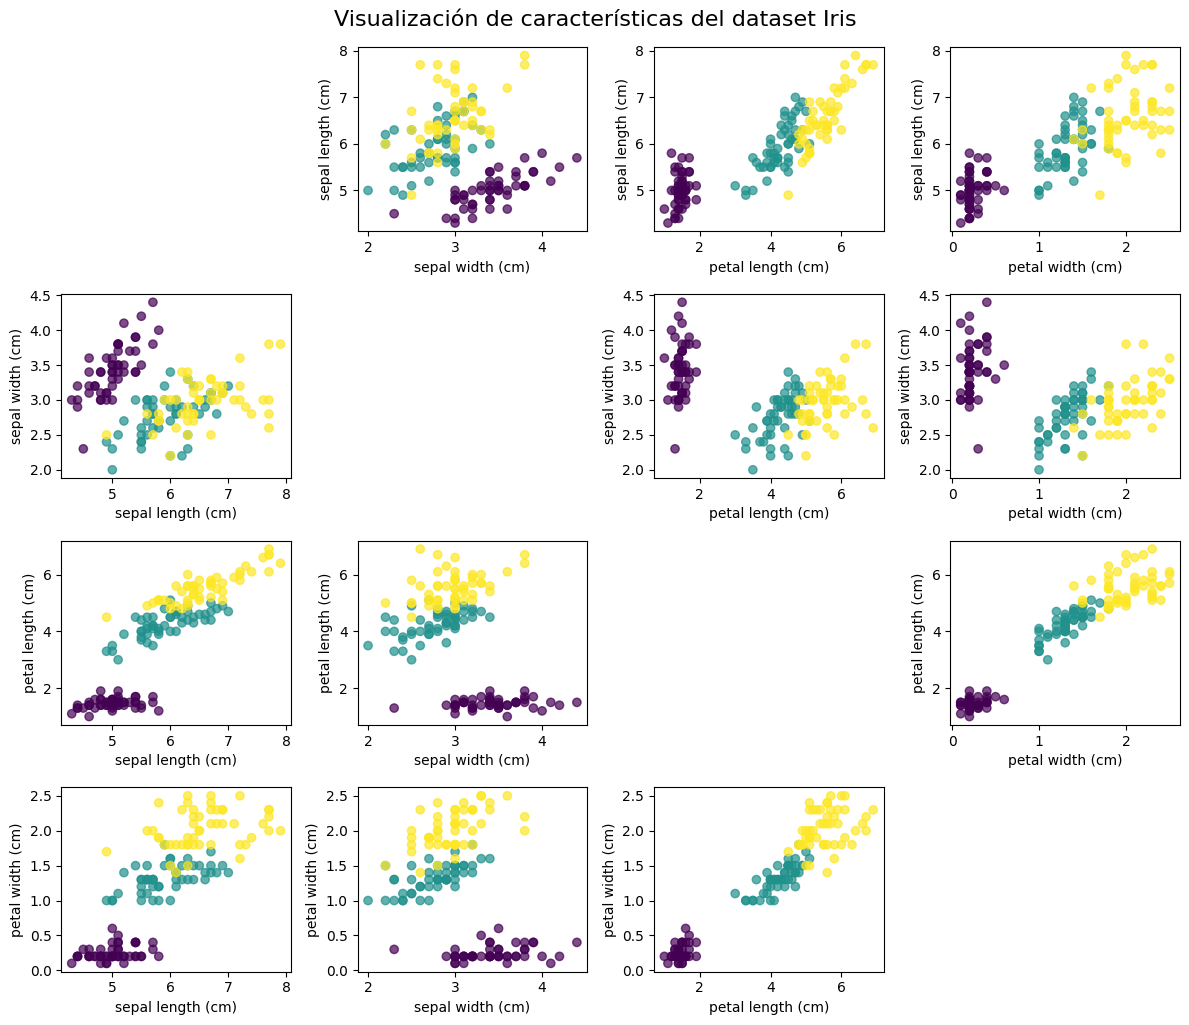

Comparación de clasificadores:
                        Accuracy   CV Mean    CV Std
Logistic Regression     0.921053  0.960000  0.038873
K-Nearest Neighbors     0.921053  0.953333  0.033993
Support Vector Machine  0.947368  0.966667  0.021082
Decision Tree           0.921053  0.973333  0.024944
Random Forest           0.921053  0.966667  0.021082


<Figure size 1000x600 with 0 Axes>

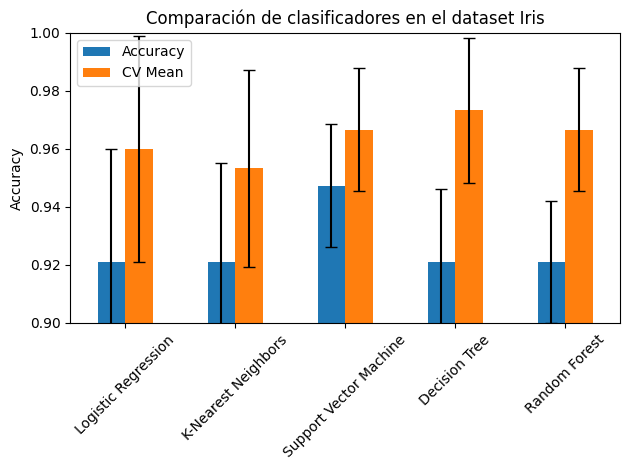


Mejor clasificador: Decision Tree

Matriz de confusión:
[[12  0  0]
 [ 0 13  0]
 [ 0  3 10]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



In [ ]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Cargamos el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Visualizamos las características
plt.figure(figsize=(12, 10))
for i in range(4):
    for j in range(4):
        if i != j:  # Evitamos la diagonal
            plt.subplot(4, 4, i*4 + j + 1)
            plt.scatter(X[:, j], X[:, i], c=y, cmap='viridis', alpha=0.7)
            plt.xlabel(feature_names[j])
            plt.ylabel(feature_names[i])

plt.tight_layout()
plt.suptitle('Visualización de características del dataset Iris', y=1.02, fontsize=16)
plt.show()

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Definimos varios clasificadores para comparar
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Support Vector Machine': SVC(gamma='scale', random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Creamos un pipeline que estandariza y luego aplica el clasificador
results = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    # Entrenamos el modelo
    pipeline.fit(X_train, y_train)

    # Evaluamos en conjunto de prueba
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # También evaluamos con validación cruzada de 5 folds
    cv_scores = cross_val_score(pipeline, X, y, cv=5)

    # Guardamos resultados
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred,
                                                      target_names=target_names)
    }

# Visualizamos los resultados
results_df = pd.DataFrame({
    'Accuracy': [results[name]['accuracy'] for name in classifiers],
    'CV Mean': [results[name]['cv_mean'] for name in classifiers],
    'CV Std': [results[name]['cv_std'] for name in classifiers]
}, index=classifiers.keys())

print("Comparación de clasificadores:")
print(results_df)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
results_df[['Accuracy', 'CV Mean']].plot(kind='bar', yerr=results_df['CV Std'], capsize=4)
plt.title('Comparación de clasificadores en el dataset Iris')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Ajustamos para ver mejor las diferencias
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostramos el reporte detallado del mejor clasificador
best_classifier = results_df['CV Mean'].idxmax()
print(f"\nMejor clasificador: {best_classifier}")
print("\nMatriz de confusión:")
print(results[best_classifier]['confusion_matrix'])
print("\nReporte de clasificación:")
print(results[best_classifier]['classification_report'])

# Visualizamos las regiones de decisión del mejor clasificador (si es SVM o KNN)
if best_classifier in ['Support Vector Machine', 'K-Nearest Neighbors']:
    # Seleccionamos solo dos características para visualización
    X_reduced = X[:, [0, 1]]  # Primeras dos características

    # Creamos un pipeline específico para estas características
    best_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifiers[best_classifier])
    ])
    best_pipe.fit(X_reduced, y)

    # Creamos una malla para visualizar la región de decisión
    h = 0.02  # Tamaño del paso de la malla
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecimos en cada punto de la malla
    Z = best_pipe.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualizamos la región de decisión
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Graficamos los puntos reales coloreados por clase
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
                        cmap='viridis', edgecolor='k', alpha=0.8)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'Región de decisión para {best_classifier}')
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.tight_layout()
    plt.show()

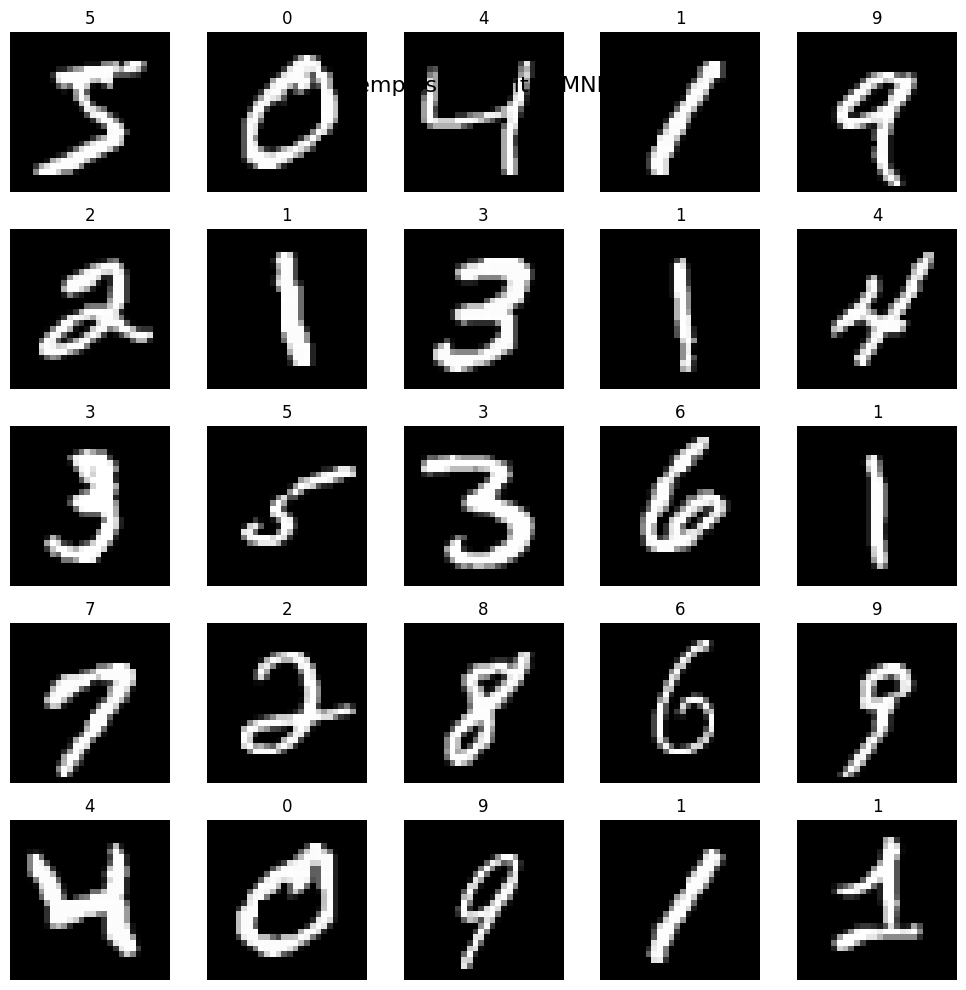

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,714 (1.67 MB)

 Trainable params: 436,010 (1.66 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.7858 - loss: 0.7119 - val_accuracy: 0.2783 - val_loss: 2.5569 - learning_rate: 0.0010
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9759 - loss: 0.0786 - val_accuracy: 0.9877 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9818 - loss: 0.0572 - val_accuracy: 0.9923 - val_loss: 0.0250 - learning_rate: 0.0010
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0426 - val_accuracy: 0.9908 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9930 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 0.9887 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0303 

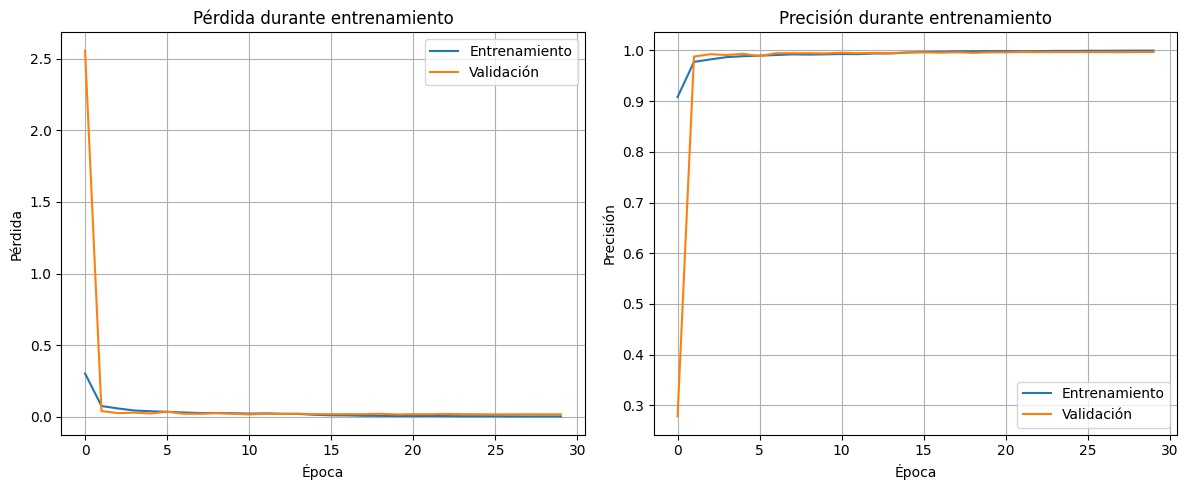

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


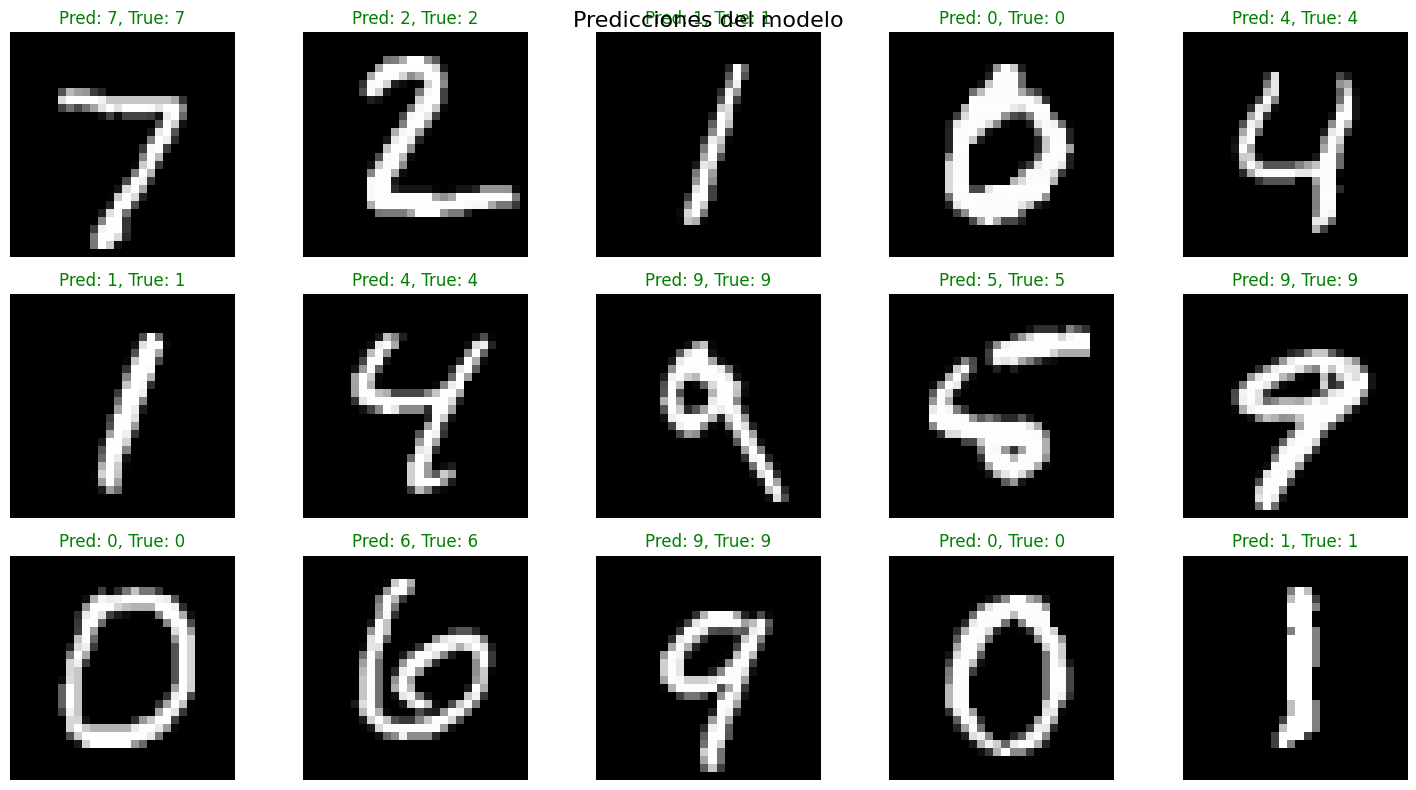

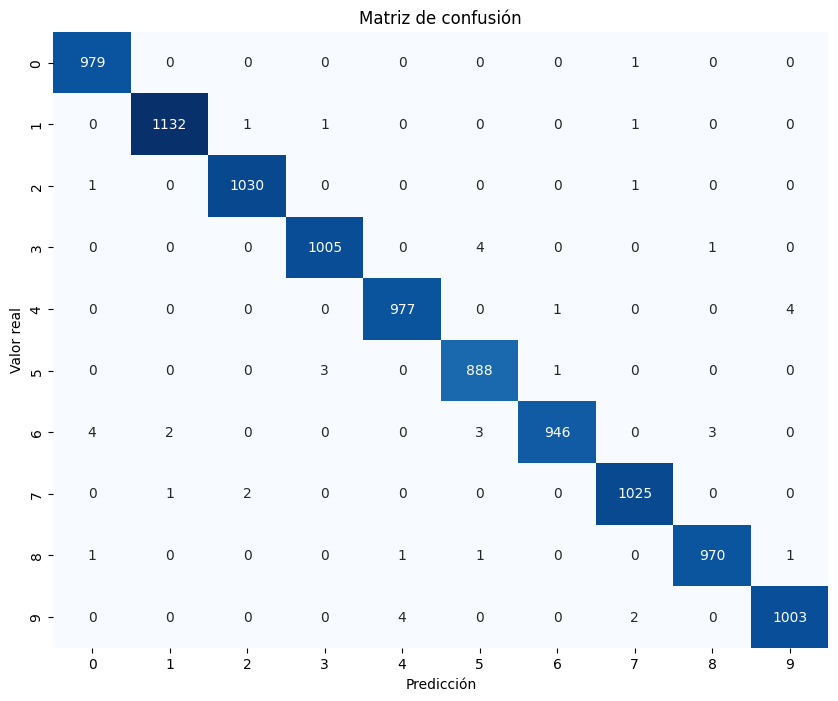

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el dataset MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocesamos los datos
# Normalizamos los valores de píxeles al rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionamos para CNN - añadimos canal
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Visualizamos algunos ejemplos
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.tight_layout()
plt.suptitle('Ejemplos de dígitos MNIST', y=0.92, fontsize=16)
plt.show()

# Convertimos las etiquetas a formato categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Definimos el modelo CNN
def create_cnn_model():
    model = models.Sequential([
        # Primera capa convolucional
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Segunda capa convolucional
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Tercera capa convolucional
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Aplanamos para conectar con capas densas
        layers.Flatten(),

        # Capas densas
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # 10 dígitos (0-9)
    ])

    return model

# Creamos y compilamos el modelo
model = create_cnn_model()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostramos la arquitectura del modelo
model.summary()

# Configuramos callbacks para el entrenamiento
callbacks_list = [
    callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-5
    )
]

# Entrenamos el modelo
history = model.fit(
    X_train, y_train,
    epochs=30,  # Ajustar según sea necesario
    batch_size=128,
    validation_split=0.1,  # 10% para validación
    callbacks=callbacks_list,
    verbose=1
)

# Evaluamos el modelo final
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en conjunto de prueba: {test_acc:.4f}")

# Visualizamos la curva de aprendizaje
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Realizamos predicciones en conjunto de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Visualizamos algunas predicciones
plt.figure(figsize=(15, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = y_pred_classes[i]
    true_label = y_true_classes[i]

    # Título en verde si es correcto, rojo si es incorrecto
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.title(f"Pred: {predicted_label}, True: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.suptitle('Predicciones del modelo', y=0.98, fontsize=16)
plt.show()

# Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

# Mostramos el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_true_classes, y_pred_classes,
                           target_names=[str(i) for i in range(10)]))

Paso 6: Recompensa acumulada = 0.50


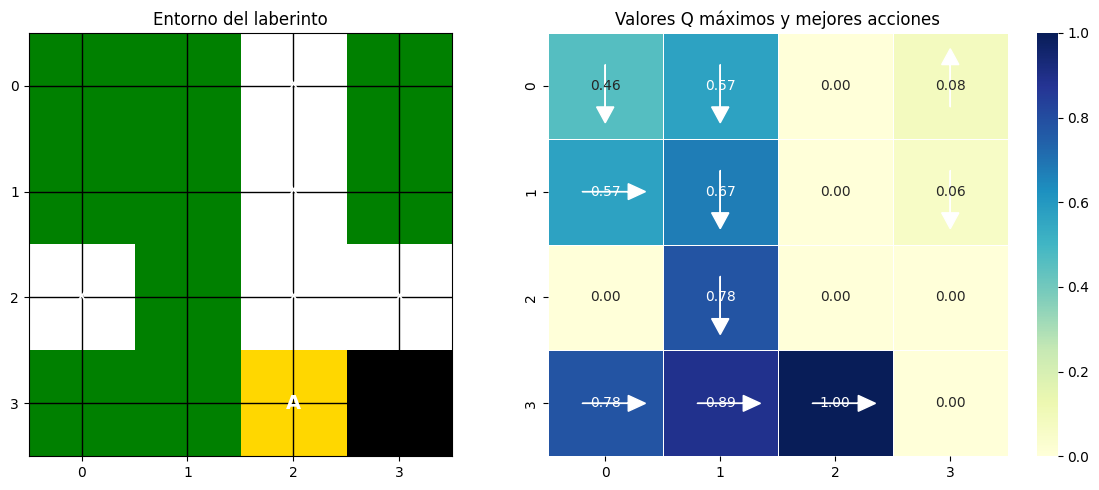

Episodio terminado: 6 pasos, Recompensa total = 0.50


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
import seaborn as sns
import time
from IPython.display import clear_output

# Definimos un entorno de laberinto simple
class MazeEnvironment:
    def __init__(self, grid_size=4):
        self.grid_size = grid_size
        self.action_space = ['U', 'R', 'D', 'L']  # Up, Right, Down, Left
        self.action_space_n = len(self.action_space)
        self.state_space_n = grid_size * grid_size

        # Definimos las posiciones de inicio, objetivo y obstáculos
        self.start_state = (0, 0)  # Esquina superior izquierda
        self.goal_state = (grid_size - 1, grid_size - 1)  # Esquina inferior derecha

        # Posiciones de obstáculos (muros)
        self.obstacles = [
            (0, 2), (1, 2), (2, 0), (2, 2), (2, 3)
        ]

        # Recompensas
        self.step_reward = -0.1  # Pequeña penalización por cada paso
        self.obstacle_reward = -1.0  # Penalización por chocar con un obstáculo
        self.goal_reward = 1.0  # Recompensa por llegar al objetivo

        # Estado actual
        self.state = self.start_state

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        # Calcular nuevo estado basado en la acción
        row, col = self.state

        if self.action_space[action] == 'U':  # Arriba
            next_state = (max(row - 1, 0), col)
        elif self.action_space[action] == 'R':  # Derecha
            next_state = (row, min(col + 1, self.grid_size - 1))
        elif self.action_space[action] == 'D':  # Abajo
            next_state = (min(row + 1, self.grid_size - 1), col)
        elif self.action_space[action] == 'L':  # Izquierda
            next_state = (row, max(col - 1, 0))

        # Verificar si el siguiente estado es un obstáculo
        if next_state in self.obstacles:
            reward = self.obstacle_reward
            next_state = self.state  # No se mueve (rebota)
        # Verificar si el siguiente estado es el objetivo
        elif next_state == self.goal_state:
            reward = self.goal_reward
            done = True
            return next_state, reward, done
        # Estado normal
        else:
            reward = self.step_reward

        # Actualizar estado actual
        self.state = next_state
        done = False

        return next_state, reward, done

    def render(self, q_table=None, policy=None):
        # Crear mapa de colores para visualización
        grid = np.zeros((self.grid_size, self.grid_size))

        # Marcar obstáculos
        for obs in self.obstacles:
            grid[obs] = -1

        # Marcar objetivo
        grid[self.goal_state] = 2

        # Marcar posición actual
        grid[self.state] = 1

        # Visualizamos el entorno
        plt.figure(figsize=(12, 5))

        # Mapa del laberinto
        plt.subplot(1, 2, 1)
        cmap = colors.ListedColormap(['white', 'green', 'gold', 'black'])
        bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        plt.imshow(grid, cmap=cmap, norm=norm)

        # Añadimos etiquetas
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if (i, j) == self.state:
                    plt.text(j, i, 'A', ha='center', va='center', color='white', fontsize=14, fontweight='bold')
                elif (i, j) == self.goal_state:
                    plt.text(j, i, 'G', ha='center', va='center', fontsize=14, fontweight='bold')
                elif (i, j) in self.obstacles:
                    plt.text(j, i, 'X', ha='center', va='center', color='white', fontsize=14)

        plt.grid(color='black', linestyle='-', linewidth=1)
        plt.xticks(np.arange(0, self.grid_size))
        plt.yticks(np.arange(0, self.grid_size))
        plt.title('Entorno del laberinto')

        # Si tenemos una tabla Q, visualizamos los valores o política
        if q_table is not None or policy is not None:
            plt.subplot(1, 2, 2)

            # Creamos una visualización de los valores Q o la política
            if q_table is not None:
                # Para cada celda, mostramos la acción con mayor valor Q
                best_actions = np.zeros((self.grid_size, self.grid_size), dtype=int)
                max_values = np.zeros((self.grid_size, self.grid_size))

                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        state_idx = i * self.grid_size + j
                        if not (i, j) in self.obstacles and not (i, j) == self.goal_state:
                            best_actions[i, j] = np.argmax(q_table[state_idx])
                            max_values[i, j] = np.max(q_table[state_idx])

                # Visualizamos los valores Q máximos como un mapa de calor
                sns.heatmap(max_values, annot=True, cmap="YlGnBu", cbar=True,
                            linewidths=.5, fmt=".2f")

                # Superponemos flechas para indicar las mejores acciones
                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        if (i, j) not in self.obstacles and (i, j) != self.goal_state:
                            action = best_actions[i, j]
                            if self.action_space[action] == 'U':
                                plt.arrow(j + 0.5, i + 0.7, 0, -0.4, head_width=0.15, head_length=0.15, fc='white', ec='white')
                            elif self.action_space[action] == 'R':
                                plt.arrow(j + 0.3, i + 0.5, 0.4, 0, head_width=0.15, head_length=0.15, fc='white', ec='white')
                            elif self.action_space[action] == 'D':
                                plt.arrow(j + 0.5, i + 0.3, 0, 0.4, head_width=0.15, head_length=0.15, fc='white', ec='white')
                            elif self.action_space[action] == 'L':
                                plt.arrow(j + 0.7, i + 0.5, -0.4, 0, head_width=0.15, head_length=0.15, fc='white', ec='white')

                plt.title('Valores Q máximos y mejores acciones')

            elif policy is not None:
                # Visualizamos la política
                policy_grid = np.zeros((self.grid_size, self.grid_size), dtype=int)
                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        state_idx = i * self.grid_size + j
                        if not (i, j) in self.obstacles and not (i, j) == self.goal_state:
                            policy_grid[i, j] = policy[state_idx]

                # Utilizamos caracteres para representar acciones
                action_chars = ['↑', '→', '↓', '←']

                plt.imshow(np.zeros((self.grid_size, self.grid_size)), cmap='gray', alpha=0.1)

                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        if (i, j) not in self.obstacles and (i, j) != self.goal_state:
                            action = policy_grid[i, j]
                            plt.text(j, i, action_chars[action], ha='center', va='center',
                                    color='blue', fontsize=18, fontweight='bold')
                        elif (i, j) == self.goal_state:
                            plt.text(j, i, 'G', ha='center', va='center',
                                    color='green', fontsize=18, fontweight='bold')
                        elif (i, j) in self.obstacles:
                            plt.text(j, i, 'X', ha='center', va='center',
                                    color='red', fontsize=18, fontweight='bold')

                plt.grid(color='black', linestyle='-', linewidth=1)
                plt.title('Política aprendida')
                plt.xticks(np.arange(0, self.grid_size))
                plt.yticks(np.arange(0, self.grid_size))

        plt.tight_layout()
        plt.show()

# Implementación del algoritmo Q-Learning
class QLearning:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0,
                 min_exploration_rate=0.01, exploration_decay=0.995):
        self.env = env
        self.lr = learning_rate  # Tasa de aprendizaje (alpha)
        self.gamma = discount_factor  # Factor de descuento
        self.epsilon = exploration_rate  # Tasa de exploración inicial
        self.epsilon_min = min_exploration_rate  # Tasa mínima de exploración
        self.epsilon_decay = exploration_decay  # Decaimiento de la exploración

        # Inicializamos la tabla Q con valores pequeños aleatorios
        self.q_table = np.random.uniform(low=0, high=0.1,
                                        size=(env.state_space_n, env.action_space_n))

        # Para el estado objetivo, establecemos todos los valores Q a 0
        goal_idx = env.goal_state[0] * env.grid_size + env.goal_state[1]
        self.q_table[goal_idx, :] = 0

    def choose_action(self, state):
        # Convertimos coordenadas (i,j) a índice único
        state_idx = state[0] * self.env.grid_size + state[1]

        # Exploración vs explotación
        if np.random.random() < self.epsilon:
            # Exploración: elegimos una acción aleatoria
            return np.random.randint(self.env.action_space_n)
        else:
            # Explotación: elegimos la mejor acción para este estado
            return np.argmax(self.q_table[state_idx, :])

    def update_q_table(self, state, action, reward, next_state, done):
        # Convertimos coordenadas a índices
        state_idx = state[0] * self.env.grid_size + state[1]
        next_state_idx = next_state[0] * self.env.grid_size + next_state[1]

        # Valor Q actual
        current_q = self.q_table[state_idx, action]

        # Calculamos el nuevo valor Q
        if done:
            # Si hemos llegado al objetivo, no hay recompensa futura
            new_q = reward
        else:
            # Ecuación de Bellman: Q(s,a) = Q(s,a) + α[r + γ·max(Q(s',a')) - Q(s,a)]
            new_q = reward + self.gamma * np.max(self.q_table[next_state_idx, :])

        # Actualizamos el valor Q
        self.q_table[state_idx, action] += self.lr * (new_q - current_q)

    def decay_exploration(self):
        # Reducimos la tasa de exploración con el tiempo
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def get_policy(self):
        # Extraemos la política a partir de la tabla Q
        policy = np.zeros(self.env.state_space_n, dtype=int)

        for state_idx in range(self.env.state_space_n):
            # Calculamos coordenadas (i,j) a partir del índice
            i = state_idx // self.env.grid_size
            j = state_idx % self.env.grid_size

            # Si es un obstáculo o el objetivo, no hay política
            if (i, j) in self.env.obstacles or (i, j) == self.env.goal_state:
                continue

            # Elegimos la acción con mayor valor Q
            policy[state_idx] = np.argmax(self.q_table[state_idx, :])

        return policy

# Función para entrenar el agente Q-Learning
def train_agent(env, agent, n_episodes=500, max_steps=100, render_interval=100):
    # Lista para almacenar recompensas por episodio
    rewards_history = []
    steps_history = []

    for episode in range(n_episodes):
        # Reiniciamos el entorno
        state = env.reset()
        total_reward = 0
        done = False
        steps = 0

        # Iteramos hasta completar el episodio o alcanzar el máximo de pasos
        for step in range(max_steps):
            # Elegimos una acción
            action = agent.choose_action(state)

            # Ejecutamos la acción
            next_state, reward, done = env.step(action)

            # Actualizamos la tabla Q
            agent.update_q_table(state, action, reward, next_state, done)

            # Actualizamos el estado y acumulamos la recompensa
            state = next_state
            total_reward += reward
            steps += 1

            # Terminamos si llegamos al objetivo
            if done:
                break

        # Reducimos la exploración
        agent.decay_exploration()

        # Registramos recompensa y pasos del episodio
        rewards_history.append(total_reward)
        steps_history.append(steps)

        # Mostramos progreso
        if episode % 100 == 0:
            print(f"Episodio {episode}/{n_episodes}: Recompensa = {total_reward:.2f}, "
                  f"Pasos = {steps}, Epsilon = {agent.epsilon:.4f}")

        # Renderizamos el entorno según el intervalo especificado
        if episode % render_interval == 0 or episode == n_episodes - 1:
            clear_output(wait=True)
            print(f"Episodio {episode+1}/{n_episodes}")
            env.render(agent.q_table)
            time.sleep(0.5)

    return rewards_history, steps_history

# Entrenamos al agente en el laberinto
np.random.seed(42)
env = MazeEnvironment(grid_size=4)
agent = QLearning(env, learning_rate=0.1, discount_factor=0.99,
                 exploration_rate=1.0, min_exploration_rate=0.01,
                 exploration_decay=0.995)

# Mostramos el laberinto antes del entrenamiento
print("Entorno inicial del laberinto:")
env.render()

# Entrenamos al agente
rewards_history, steps_history = train_agent(
    env, agent, n_episodes=1000, max_steps=100, render_interval=250)

# Visualizamos los resultados del entrenamiento
plt.figure(figsize=(15, 5))

# Gráfico de recompensas
plt.subplot(1, 2, 1)
plt.plot(rewards_history)
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.title('Recompensas durante el entrenamiento')
plt.grid(True)

# Para suavizar la curva, calculamos la media móvil
window_size = 50
rewards_smoothed = np.convolve(rewards_history,
                              np.ones(window_size)/window_size,
                              mode='valid')
plt.plot(range(window_size-1, len(rewards_history)),
         rewards_smoothed, 'r-', linewidth=2)
plt.legend(['Recompensa por episodio', f'Media móvil ({window_size} episodios)'])

# Gráfico de pasos
plt.subplot(1, 2, 2)
plt.plot(steps_history)
plt.xlabel('Episodio')
plt.ylabel('Número de pasos')
plt.title('Pasos por episodio durante el entrenamiento')
plt.grid(True)

# Suavizamos también la curva de pasos
steps_smoothed = np.convolve(steps_history,
                            np.ones(window_size)/window_size,
                            mode='valid')
plt.plot(range(window_size-1, len(steps_history)),
         steps_smoothed, 'r-', linewidth=2)
plt.legend(['Pasos por episodio', f'Media móvil ({window_size} episodios)'])

plt.tight_layout()
plt.show()

# Mostramos la política final
print("Política final aprendida:")
policy = agent.get_policy()
env.render(policy=policy)

# Evaluamos la política final (sin exploración)
def evaluate_policy(env, agent, n_episodes=10):
    steps_to_goal = []
    total_rewards = []

    for episode in range(n_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < 100:
            # Seguimos la política óptima (sin exploración)
            state_idx = state[0] * env.grid_size + state[1]
            action = np.argmax(agent.q_table[state_idx])

            # Ejecutamos la acción
            next_state, reward, done = env.step(action)

            # Actualizamos
            state = next_state
            total_reward += reward
            steps += 1

        steps_to_goal.append(steps)
        total_rewards.append(total_reward)

        print(f"Episodio de evaluación {episode+1}: Pasos = {steps}, Recompensa = {total_reward:.2f}")

    print(f"Promedio de pasos al objetivo: {np.mean(steps_to_goal):.2f}")
    print(f"Promedio de recompensa: {np.mean(total_rewards):.2f}")

    return steps_to_goal, total_rewards

# Evaluamos la política final
evaluation_steps, evaluation_rewards = evaluate_policy(env, agent)

# Simulamos un episodio final para visualizar el comportamiento del agente
def simulate_episode(env, agent):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0

    states_visited = [state]

    while not done and steps < 100:
        # Elegimos acción según la política
        state_idx = state[0] * env.grid_size + state[1]
        action = np.argmax(agent.q_table[state_idx])

        # Ejecutamos la acción
        next_state, reward, done = env.step(action)

        # Actualizamos
        state = next_state
        states_visited.append(state)
        total_reward += reward
        steps += 1

        # Renderizamos cada paso
        clear_output(wait=True)
        print(f"Paso {steps}: Recompensa acumulada = {total_reward:.2f}")
        env.render(agent.q_table)
        time.sleep(0.5)

    print(f"Episodio terminado: {steps} pasos, Recompensa total = {total_reward:.2f}")

    return states_visited, total_reward

# Simulamos un episodio completo siguiendo la política aprendida
print("Simulando un episodio completo con la política aprendida:")
states_visited, final_reward = simulate_episode(env, agent)